In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt,pydotplus
import seaborn as sns
%matplotlib inline

In [49]:
churndf = pd.read_csv("Churn.txt")

In [50]:
churndf.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [51]:
#Columns and row in our data
churndf.shape

(3333, 21)

In [52]:
#gives the list of columns in the dataset.
#churndf.columns.values or
print(churndf.columns)

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')


In [53]:
#Check number of nan or null values present in each columns.
print(churndf.isnull().sum())
#our data does not contain any missing values.

State             0
Account Length    0
Area Code         0
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn?            0
dtype: int64


In [54]:
#Here we see how our data is like mean average and all that.
print(churndf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

In [55]:
#Renaming the column 'Int'l Plan' to 'Intl plan' and 'Churn?' t9 'Churn' since it will create problem
churndf.rename(columns={"Int'l Plan":"Intl_plan", "Churn?":"Churn","VMail Plan":"VMail_Plan","Account Length":"Account_Length"}, inplace=True)
churndf.columns.values

array(['State', 'Account_Length', 'Area Code', 'Phone', 'Intl_plan',
       'VMail_Plan', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls',
       'Intl Charge', 'CustServ Calls', 'Churn'], dtype=object)

In [56]:
#Here we are transforming the data yes/no/true/folse to 0/1 (string to numeric value)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

churndf['Intl_plan'] = le.fit_transform(churndf.Intl_plan)
churndf['VMail_Plan'] = le.fit_transform(churndf.VMail_Plan)
#no = 0
#yes = 1
churndf['Churn'] = le.fit_transform(churndf.Churn)
#false = 0
#true = 1

In [57]:
churndf.head()

,State,Account_Length,Area Code,Phone,Intl_plan,VMail_Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [58]:
#Taking count of churn i.e. 1
c, nc = churndf['Churn'].value_counts()[1], churndf['Churn'].value_counts()[0]
print(c,nc)
#Here c is churn(True) and nc is notChurn(False)

483 2850


In [59]:
#Now we need to normalize all the numerical data

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

churn = churndf.drop(columns={'State','Phone','Intl_plan','VMail_Plan','Churn','Area Code'},inplace=False)
churn.head()

,Account_Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [60]:
churn = mms.fit_transform(churn) #Here churn is numpy ndarry
churn = pd.DataFrame(churn, columns=['Account_Length','VMail_Message','Day_Mins','Day_Calls','Day_Charge','Eve_Mins','Eve_Calls','Eve_Charge','Night_Mins','Night_Calls','Night_Charge','Intl_Mins','Intl_Calls','Intl_Charge','CustServ_Calls']) #Here we are converting it into pandas dataframe
churn.head()
#extrdClmns =  ['VMail_Plan'] ['Churn']

churn.insert(2,'VMail_Plan', churndf['VMail_Plan'])
churn.insert(12,'Intl_plan', churndf['Intl_plan'])
churn.insert(17,'Churn', churndf['Churn'])
#Now churn dataframe contatins all Normalised values
churn.head() 

,Account_Length,VMail_Message,VMail_Plan,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_plan,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn
0,0.524793,0.490196,1,0.755701,0.666667,0.755701,0.542755,0.582353,0.542866,0.595750,0.408451,0.595935,0,0.500,0.15,0.500000,0.111111,0
1,0.438017,0.509804,1,0.460661,0.745455,0.460597,0.537531,0.605882,0.537690,0.621840,0.492958,0.622236,0,0.685,0.15,0.685185,0.111111,0
2,0.561983,0.000000,0,0.693843,0.690909,0.693830,0.333242,0.647059,0.333225,0.374933,0.500000,0.375374,0,0.610,0.25,0.609259,0.000000,0
3,0.342975,0.000000,0,0.853478,0.430303,0.853454,0.170195,0.517647,0.170171,0.467187,0.394366,0.467424,1,0.330,0.35,0.329630,0.222222,0
4,0.305785,0.000000,0,0.475200,0.684848,0.475184,0.407754,0.717647,0.407959,0.440290,0.619718,0.440526,1,0.505,0.15,0.505556,0.333333,0


<AxesSubplot:>

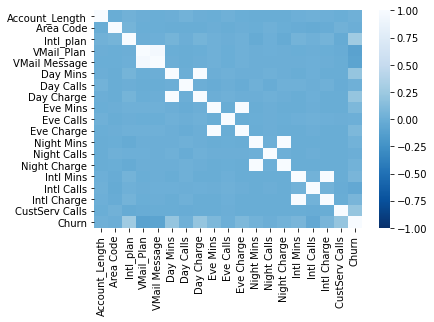

In [61]:
#Here we need to find the correlation
cor = churndf.corr()
sns.heatmap(cor,vmin=-1,vmax=1,cmap="Blues_r")

<AxesSubplot:>

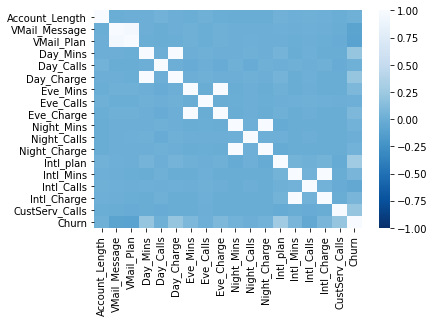

In [62]:
#Here with this representatin I have tried to show that normalizing the data doesn't change the correlation of variables.

cor = churn.corr()
sns.heatmap(cor,vmin=-1,vmax=1,cmap="Blues_r")

<h4><font color="Green"> Here we can see from the heatmap that there is high correlation with churn is 'Intl plan','VMail_plan', 'Day Mins', 'Day Charge','CustServ Calls'</font></h4>

In [63]:
#In the below illustration we can clearly see that.
churndf.corr().style.background_gradient(cmap='coolwarm')

,Account_Length,Area Code,Intl_plan,VMail_Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
Account_Length,1.000000,-0.012463,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Area Code,-0.012463,1.000000,0.048551,-0.000747,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
Intl_plan,0.024735,0.048551,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
VMail_Plan,0.002918,-0.000747,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
VMail Message,-0.004628,-0.001994,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Day Mins,0.006216,-0.008264,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Day Calls,0.038470,-0.009646,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Day Charge,0.006214,-0.008264,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Eve Mins,-0.006757,0.003580,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Eve Calls,0.019260,-0.011886,0.006114,-0.006444,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233


In [64]:
#Perform the same on normalized dataframe
churn.corr().style.background_gradient(cmap='coolwarm')
#From this we can see that there is no differnce in correlation between the attributes 

,Account_Length,VMail_Message,VMail_Plan,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_plan,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn
Account_Length,1.000000,-0.004628,0.002918,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.024735,0.009514,0.020661,0.009546,-0.003796,0.016541
VMail_Message,-0.004628,1.000000,0.956927,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.008745,0.002856,0.013957,0.002884,-0.013263,-0.089728
VMail_Plan,0.002918,0.956927,1.000000,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,0.006006,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
Day_Mins,0.006216,0.000778,-0.001684,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,0.049396,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Day_Calls,0.038470,-0.009548,-0.011086,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.003755,0.021565,0.004574,0.021666,-0.018942,0.018459
Day_Charge,0.006214,0.000776,-0.001686,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,0.049398,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Eve_Mins,-0.006757,0.017562,0.021545,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,0.019100,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Eve_Calls,0.019260,-0.005864,-0.006444,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.006114,0.008703,0.017434,0.008674,0.002423,0.009233
Eve_Charge,-0.006745,0.017578,0.021559,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,0.019106,-0.011043,0.002541,-0.011074,-0.012987,0.092786
Night_Mins,-0.008955,0.007681,0.006079,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.028905,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


In [67]:
#Here we will see the dependencies of variables using graph.
newchurn = churn.drop(columns={'Account_Length','VMail_Message','Day_Calls','Eve_Mins','Eve_Calls','Eve_Charge','Night_Mins','Night_Calls','Night_Charge','Intl_Mins','Intl_Calls','Intl_Charge'},inplace=False)
newchurn.head()
print(newchurn.shape)

(3333, 6)


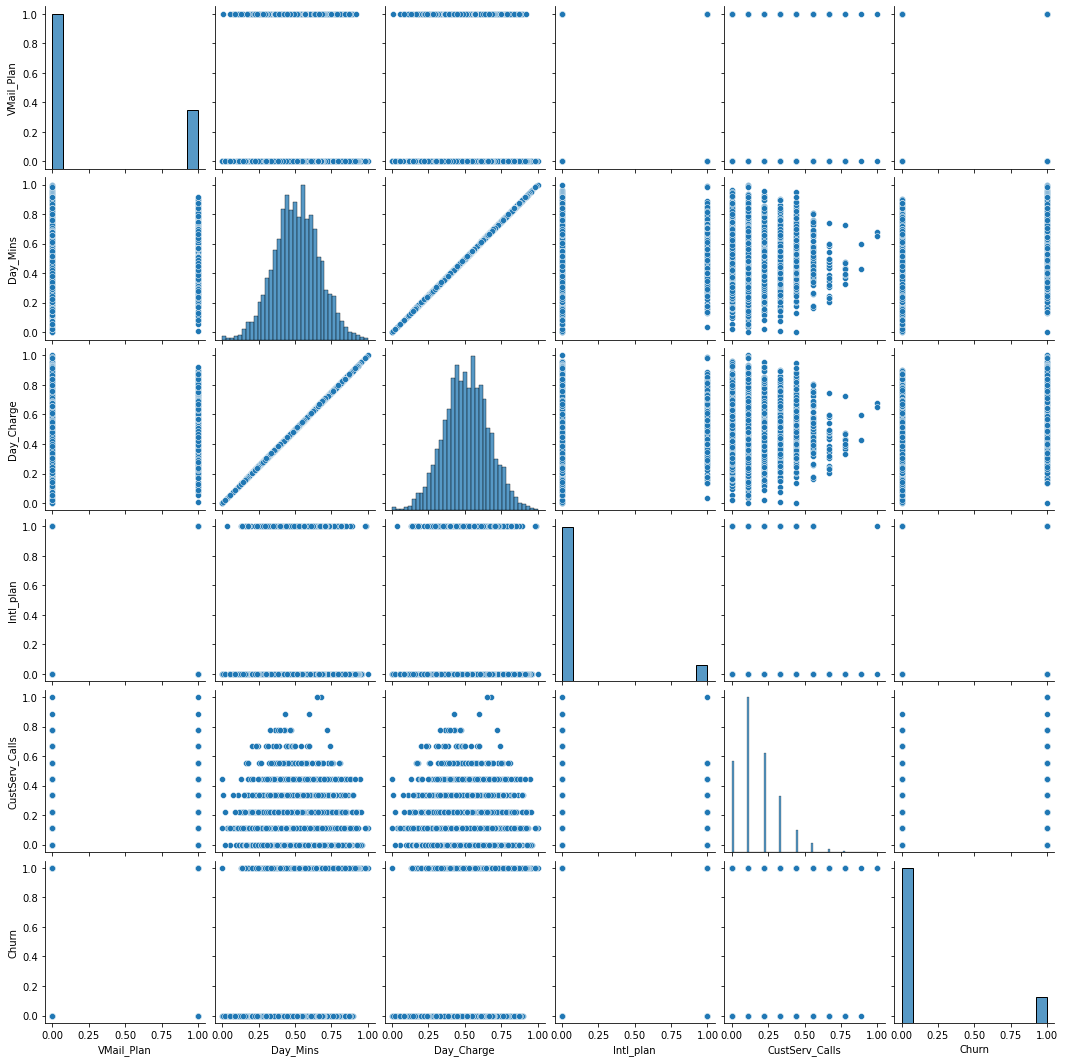

In [68]:
sns.pairplot(newchurn)

In [69]:
#Now we have to generate CART(using 'gini') Decision Tree.
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

y = newchurn.iloc[:,-1]
x = newchurn.iloc[:,:-1]

#y is the label we want to determine or find out
print(y[:5])

#x is the features based on which we will be determining our churn or y value
print(x[:5])

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int32
   VMail_Plan  Day_Mins  Day_Charge  Intl_plan  CustServ_Calls
0           1  0.755701    0.755701          0        0.111111
1           1  0.460661    0.460597          0        0.111111
2           0  0.693843    0.693830          0        0.000000
3           0  0.853478    0.853454          1        0.222222
4           0  0.475200    0.475184          1        0.333333


In [70]:
#Split our dataset into train and test dataset
#Here we will be using 70% of the data to train the model and 30% to test it
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=23345)
model = DecisionTreeRegressor(max_leaf_nodes=2)
rt = model.fit(x_train,y_train)
rt

DecisionTreeRegressor(max_leaf_nodes=2)

In [71]:
DecisionTreeRegressor(criterion='gini', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')


DecisionTreeRegressor(criterion='gini', presort=False)

In [72]:
#Here we have tried to find out how our model is responding. What is the precesion.
from sklearn.metrics import r2_score
YPred = model.predict(x_test)

r1 = r2_score(y_test, YPred)
print("R-Squared = ", r1)

R-Squared =  0.09083739780302802


In [73]:
#Here we have tried to Generate the full set of decision rules for the CART decision tree.

# from sklearn import tree
# from IPython.display import Image,display
# import matplotlib.pyplot as plt

# gdata = tree.export_graphviz(rt, out_file=None, filled=True, rounded=True,
#                             feature_names=['VMail_Plan','Day_Mins','Day_Charge','Intl_plan','CustServ_Calls'],
#                             class_names=[0,1])
# graph = plt.graph_from_dot_data(gdata)
# display(Image(graph.create_png()))

In [74]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

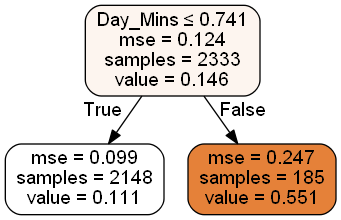

In [75]:
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus

feature_cols=['VMail_Plan','Day_Mins','Day_Charge','Intl_plan','CustServ_Calls']
dot_data = StringIO()
export_graphviz(rt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('churnTree.png')
Image(graph.create_png())


In [76]:
print(x_train.shape)
print(y_train.shape)

(2333, 5)
(2333,)


In [77]:
#First we will import the c4.5 module.
from c45 import C45

In [79]:
#Here we will create c4.5 Decision Tree  model and fit train dataset and we will print the accuracy of the test dataset.
clf = C45(attrNames=x.columns)
clf.fit(x_train, y_train)
print(f'Accuracy: {clf.score(x_test, y_test)}')

Accuracy: 0.851


In [80]:
#Generate the full set of decision rules for the C4.5 decision tree.
clf.printTree()

<?xml version="1.0" ?>
<DecisionTree>
	<DayMins value="0.7411630558722919" flag="l" p="0.921">
		<CustServCalls value="0.4444444444444444" flag="l" p="0.919">
			<Intlplan value="1.0" flag="l" p="0.912">
				<DayMins value="0.6325541619156215" flag="l" p="0.85">
					<DayMins value="0.23346636259977196" flag="l" p="0.043">0</DayMins>
					<DayMins value="0.23346636259977196" flag="r" p="0.957">
						<DayMins value="0.2346066134549601" flag="l" p="0.001">1</DayMins>
						<DayMins value="0.2346066134549601" flag="r" p="0.999">
							<DayMins value="0.2750855188141391" flag="l" p="0.034">0</DayMins>
							<DayMins value="0.2750855188141391" flag="r" p="0.966">
								<DayMins value="0.2767958950969213" flag="l" p="0.004">
									<VMailPlan value="1.0" flag="l" p="0.6">
										<DayMins value="0.2759407069555302" flag="l" p="0.667">
											<DayMins value="0.2756556442417332" flag="l" p="0.5">1</DayMins>
											<DayMins value="0.2756556442417332" flag="r" p="0.5">0</DayMins